In [1]:
## 参考 https://neptune.ai/blog/how-to-code-bert-using-pytorch-tutorial

# 1. What is BERT?

[BERT](https://arxiv.org/pdf/1810.04805.pdf) stands for “Bidirectional Encoder Representation with Transformers”. To put it in simple words BERT extracts patterns or representations from the data or word embeddings by passing it through an encoder. The encoder itself is a transformer architecture that is stacked together. It is a bidirectional transformer which means that during training it considers the context from both left and right of the vocabulary to extract patterns or representations. 

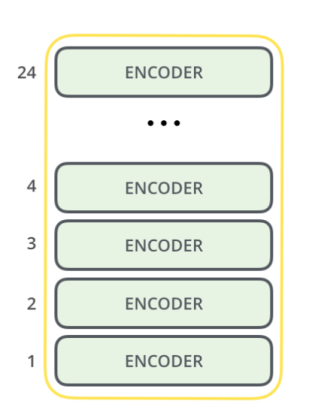

BERT uses two training paradigms: **Pre-training** and **Fine-tuning**. 

During **pre-training**, the model is trained on a large dataset to extract patterns. This is generally an **unsupervised learning** task where the model is trained on an unlabelled dataset like the data from a big corpus like Wikipedia.  

During **fine-tuning** the model is trained for downstream tasks like Classification, Text-Generation, Language Translation, Question-Answering, and so forth. Essentially, you can download a pre-trained model and then Transfer-learn the model on your data. 

## 1.1 Core components of BERT

BERT borrows ideas from the previous release SOTA models. Let’s elaborate on that statement.  

### 1.1.1 The Transformers

> 利用了Transformer的特征提取架构

BERT’s main component is the transformer architecture. The transformers are made up of two components: encoder and decoder. The encoder itself contains two components: the **self-attention layer** and **feed-forward neural network**. 

The self-attention layer takes an input and encodes each word into intermediate encoded representations which are then passed through the feed-forward neural network. The feed-forward network passes those representations to the decoder that itself is made up of three components: **self-attention layer, Encoder-Decoder Attention, and feed-forward neural network**. 

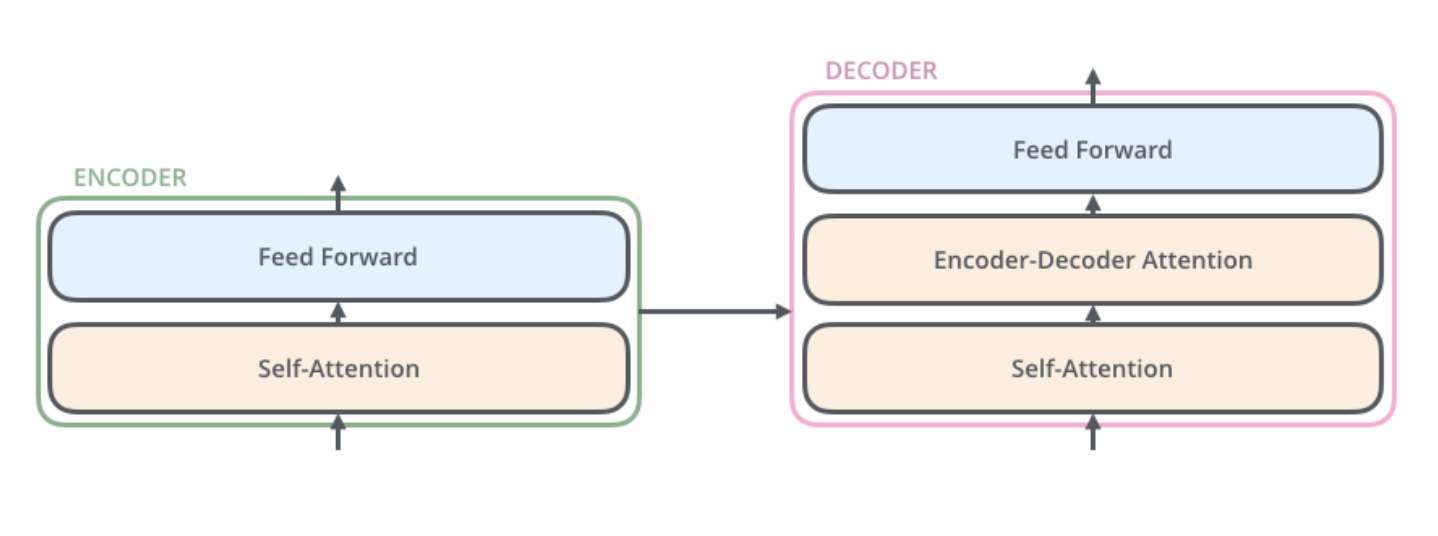

The benefit of the transformer architecture is that it helps the model to retain infinitely long sequences that were not possible from the traditional RNNs, LSTMs, and GRU. But even from the fact that it can achieve long-term dependencies it still **lacks contextual understanding**.

*Jay Alammar explains transformers in-depth in his article [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/), worth checking out.*  

### 1.1.2 ELMo

> 从上下文中双向学习词表征

BERT borrows another idea from ELMo which stands for Embeddings from Language Model. ELMo was introduced by [Peters et. al](https://arxiv.org/abs/1802.05365). in 2017 which dealt with the idea of contextual understanding. The way ELMo works is that it uses bidirectional LSTM to make sense of the context. Since it considers words from both directions, it can assign different word embedding to words that are spelled similarly but have different meanings. 

For instance, “You kids should **stick** together in the dark” is completely different from “Hand me that **stick**”. Even though the same word is being used in both sentences the meaning is different based on the context. 

So, ELMo assigns embeddings by considering the words from both the right and left directions as compared to the models that were developed previously which took into consideration words, only from the left. These models were unidirectional like RNNs, LSTMs et cetera. 

This enables ELMo to capture contextual information from the sequences but since ELMo uses LTSM it does not have long-term dependency compared to transformers.

So far we have seen that BERT can access sequences in the document even if it is ‘n’ words behind the current word in the sequence because of the attention mechanism present in transformers, i.e. it can preserve long term dependencies and it can also achieve a contextual understanding of the sentence because of the bidirectional mechanism present in ELMo. 

### 1.1.3 ULM-Fit

> 迁移学习机制

In 2018 Jeremy Howard and Sebastian Ruder released a paper called [Universal Language Model Fine-tuning or ULM-FiT](https://arxiv.org/pdf/1801.06146.pdf), where they argued that transfer learning can be used in NLP just like it is used in computer vision. 

Previously we were using pre-trained models for word-embeddings that only targeted the first layer of the entire model, i.e. the embedding layers, and the whole model was trained from the scratch, this was time-consuming, and not a lot of success was found in this area. However, Howard and Ruder proposed 3 methods for the classification of text:

+ The first step includes training the model on a larger dataset so that the model learns representations. 
+ The second step included fine-tuning the model with a task-specific dataset for classification, during which they introduced two more methods: Discriminative fine-tuning and Slanted triangular learning rates (STLR). The former method tries to fine-tune or optimize the parameters for each during the transfer layer in the network while the latter controls the learning rate in each of the optimization steps. 
+ The third step was to fine-tune the classifier on the task-specific dataset for classification. 

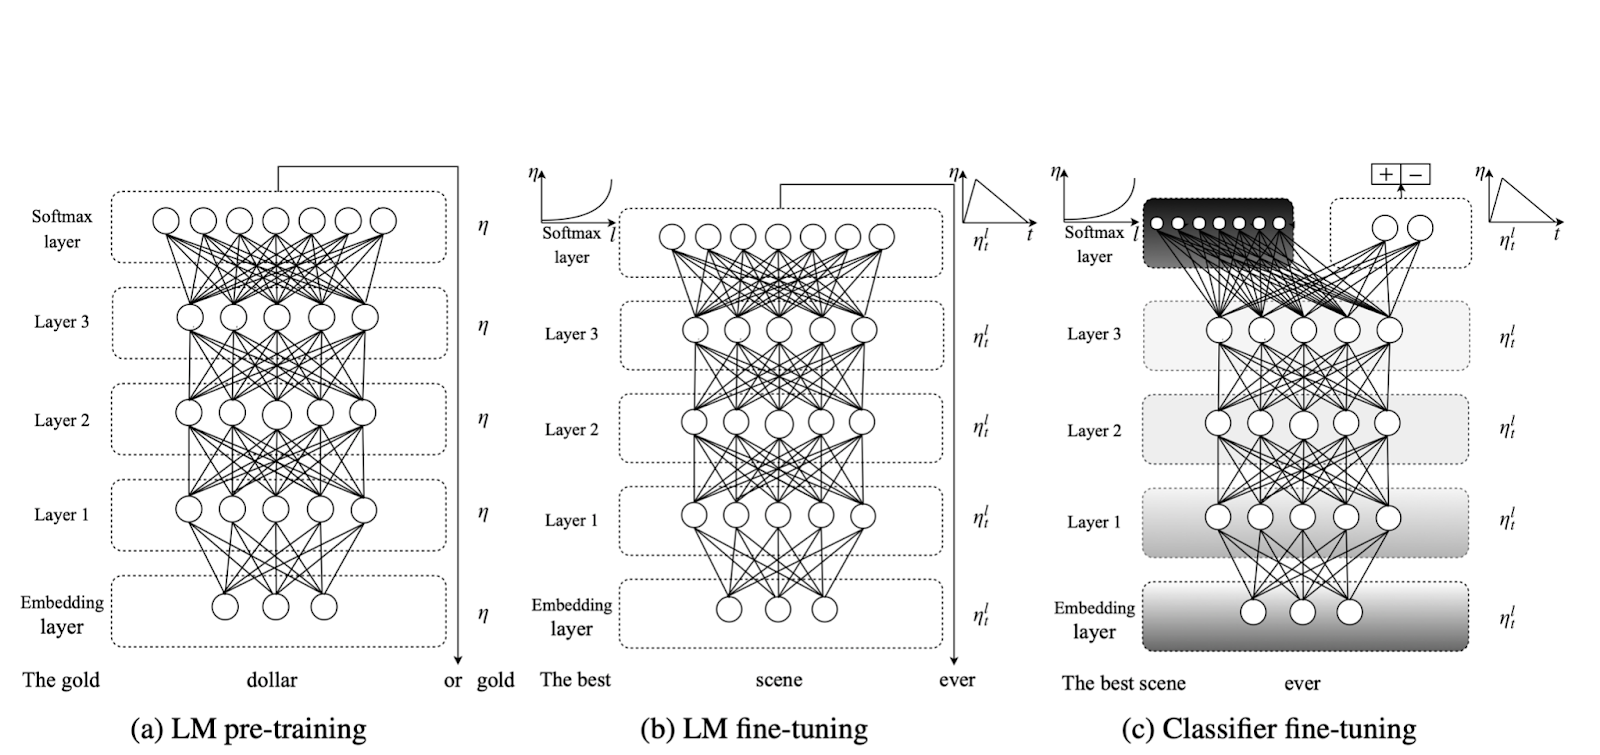

With the release of ULM-FiT NLP practitioners can now practice the transfer learning approach in their NLP problems. But the only problem with the ULM-FiT approach to transfer learning was that it included fine-tuning all the layers in the network which was a lot of work. 

### 1.1.4 OpenAI GPT

> 从GPT中参考经验

Generative Pre-trained Transformer or GPT was introduced by OpenAI’s team: Radford, Narasimhan, Salimans, and Sutskever. They presented a model that only uses decoders from the transformer instead of encoders in a unidirectional approach. As a result, it outperformed all the previous models in various tasks like: 

+ Classification
+ Natural Language Inference
+ Semantic similarity
+ Question answering 
+ Multiple Choice.   

Even though the GPT used only the decoder, it could still retain long-term dependencies. Furthermore, it reduced fine-tuning to a minimum compared to what we saw in ULM-FiT. 

Below is the table that compares different models based upon pre-training, downstream tasks, and most importantly fine-tuning. 

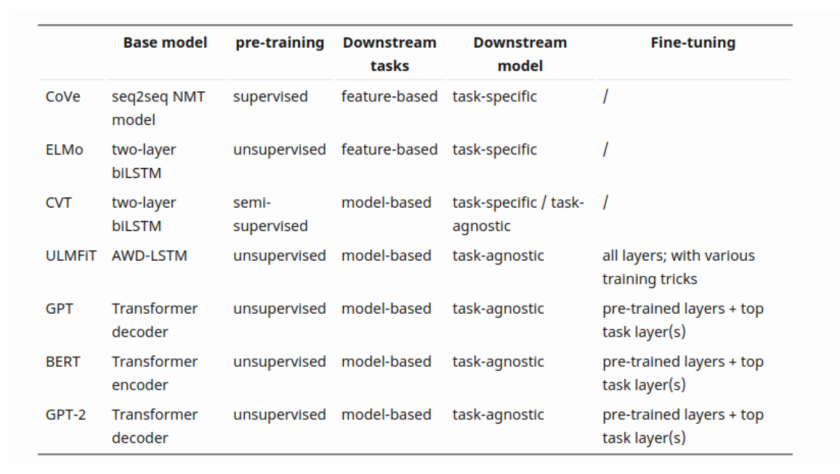

An excerpt from the [GPT paper](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf) reads *“This model choice provides us with a more structured memory for handling long-term dependencies in text, compared to alternatives like recurrent networks, resulting in robust transfer performance across diverse tasks. During the transfer, we utilize task-specific input adaptations derived from traversal-style approaches, which process structured text input as a single contiguous sequence of tokens. As we demonstrate in our experiments, these adaptations enable us to fine-tune effectively with minimal changes to the architecture of the pre-trained model.”*  

Let’s compare all the model with BERT for the tasks they can perform:

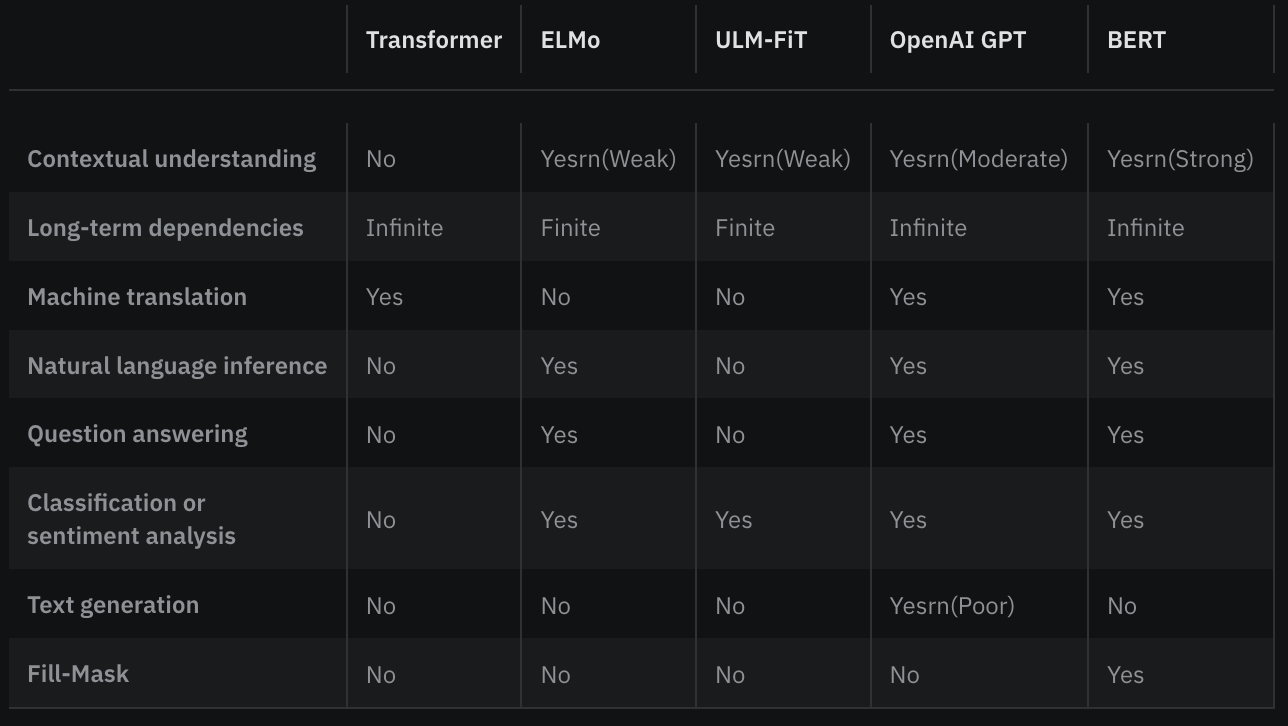

You can check [Huggingface models](https://huggingface.co/models) to check the model’s performance on every task. 

# 2 Why BERT?

BERT falls into a [self-supervised](https://neptune.ai/blog/self-supervised-learning) model. That means, it can generate inputs and labels from the raw corpus without being explicitly programmed by humans. Remember the data it is trained on is unstructured.

BERT was pre-trained with two specific tasks: Masked Language Model and Next sentence prediction. The former uses masked input like “the man [MASK] to the store” instead of “the man went to the store”. This restricts BERT to see the words next to it which allows it to learn bidirectional representations as much as possible making it much more flexible and reliable for several downstream tasks. The latter predicts whether the two sentences are contextually assigned to each other. 

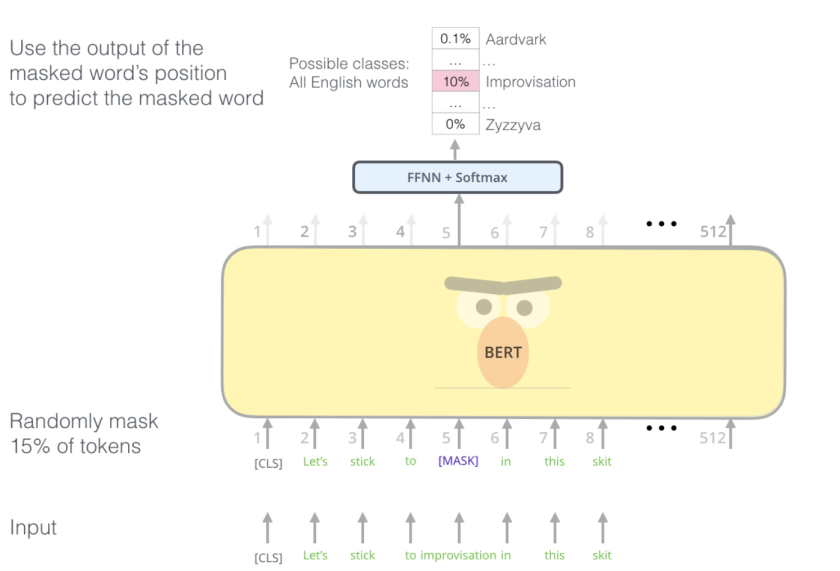

For instance, if sentence A is “[CLS] the man [MASK] to the store” and sentence B is “penguin [MASK] are flightless birds [SEP]”, then BERT will be able to classify whether both the sentences are continuous or not. 

During the training, BERT uses special types of tokens like [CLS], [MASK], [SEP] et cetera, that allow BERT to distinguish when a sentence begins, which word is masked, and when two sentences are separated. I have explained these tokens in tabular format in the **preprocessing** section. 

**BERT can also be used for feature extraction** because of the properties we discussed previously and feed these extractions to your existing model. 

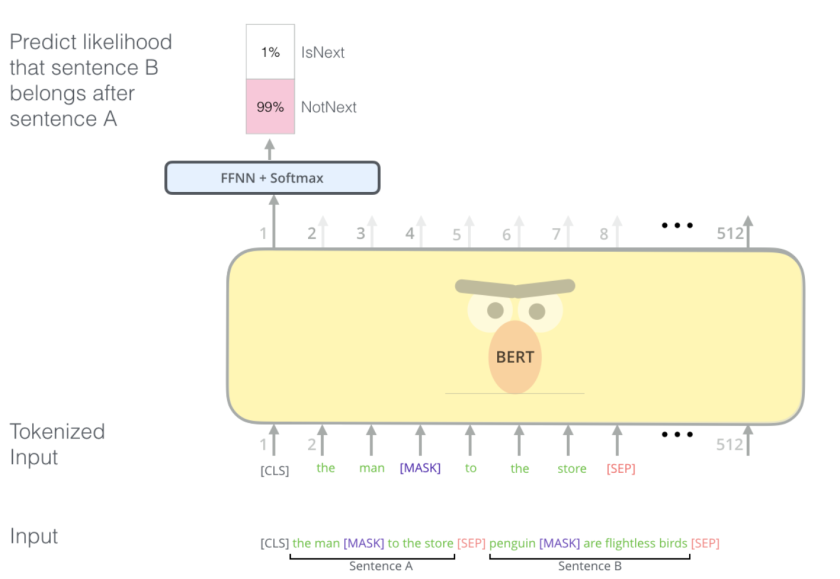

In the original BERT paper, it was compared with GPT on the [General Language understanding evaluation benchmark](https://gluebenchmark.com/), and here are the results. 

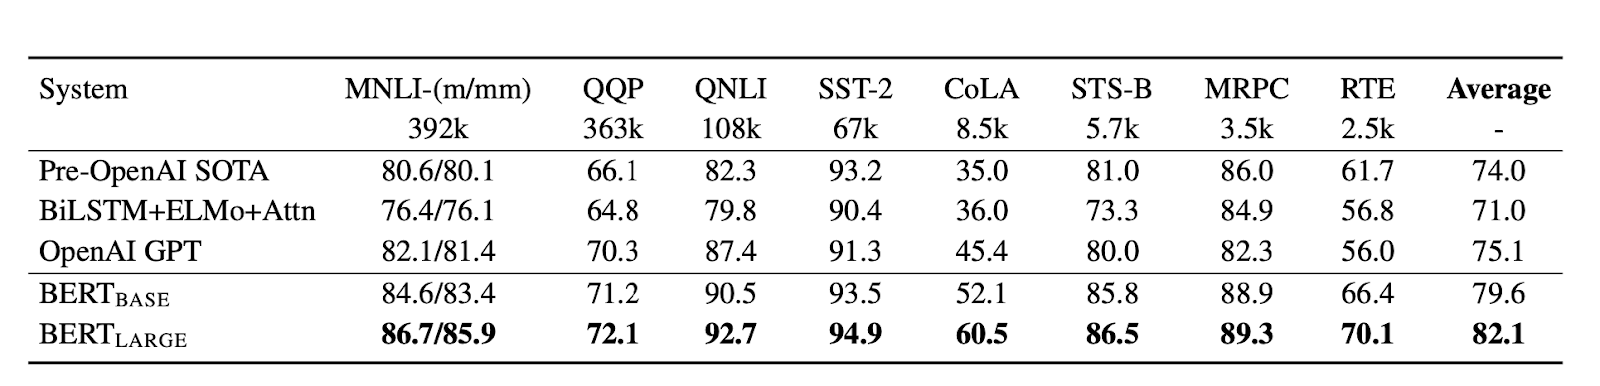

As you can see BERT outperformed GPT in all the tasks and averages 7% better than GPT.  
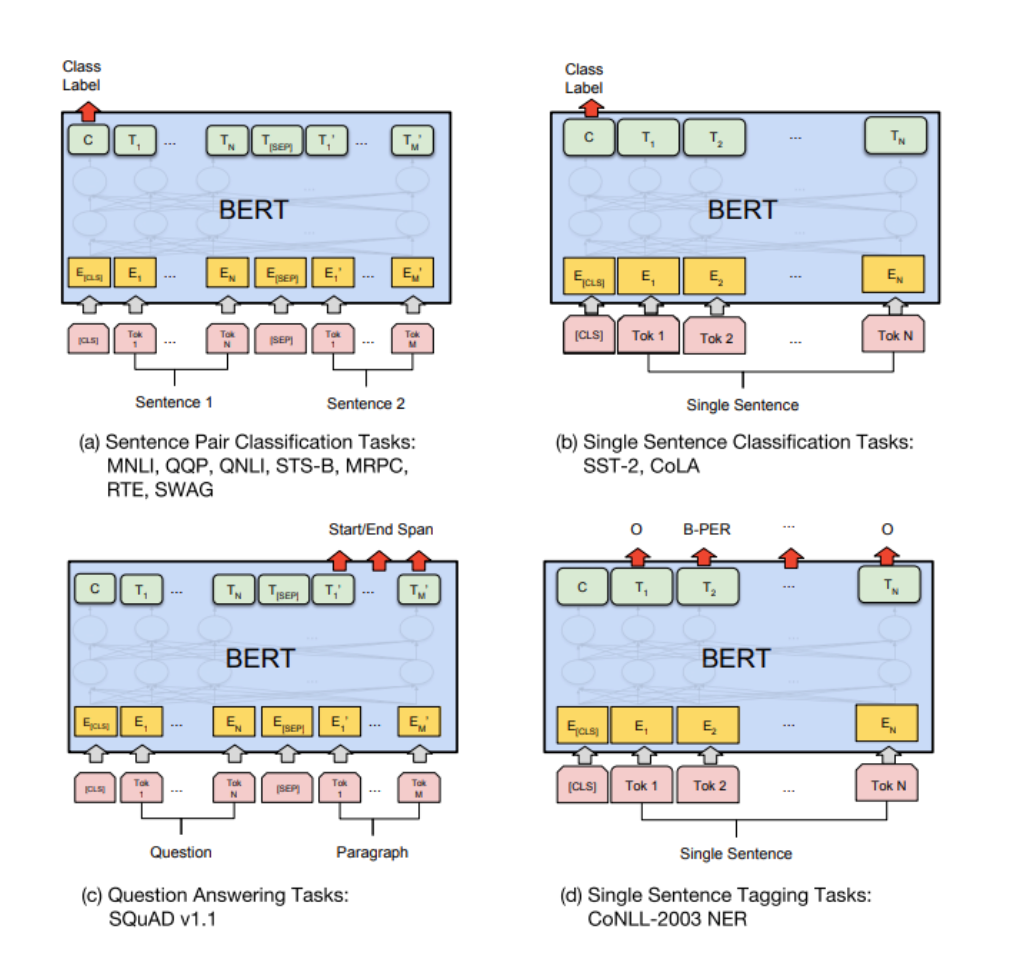

# 3 Coding BERT with Pytorch

Let’s understand with code how to build BERT with PyTorch. 

We will break the entire program into 4 sections:

1. Preprocessing
2. Building model
3. Loss and Optimization
4. Training

In [152]:
import re
import math
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from typing import *

## 3.1 Preprocessing

In [13]:
text = (
       'Hello, how are you? I am Romeo.\n'
       'Hello, Romeo My name is Juliet. Nice to meet you.\n'
       'Nice meet you too. How are you today?\n'
       'Great. My baseball team won the competition.\n'
       'Oh Congratulations, Juliet\n'
       'Thanks you Romeo.'
)

In [19]:
def get_sentences(content: str) -> List[str]:
    pattern = re.compile("[.,?!-]")
    return [pattern.sub("", s.lower()) for s in content.split("\n")]

In [20]:
sentences = get_sentences(text)
sentences

['hello how are you i am romeo',
 'hello romeo my name is juliet nice to meet you',
 'nice meet you too how are you today',
 'great my baseball team won the competition',
 'oh congratulations juliet',
 'thanks you romeo']

Now, in the following step, it is important to remember that BERT takes special tokens during training. Here is a table explaining the purpose of various tokens:  

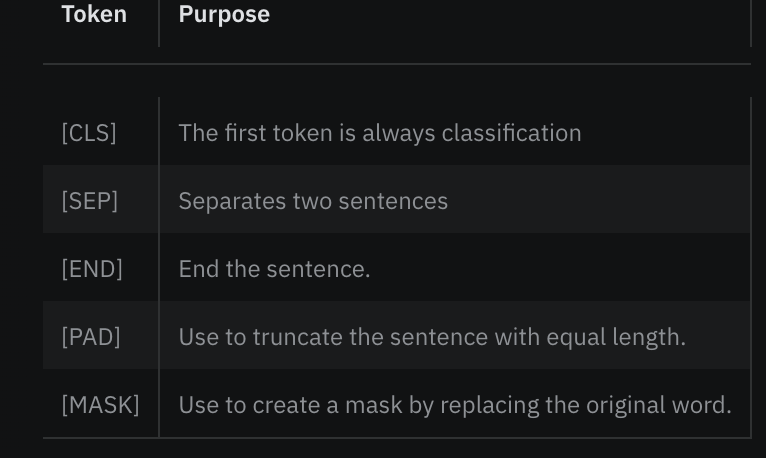

These tokens should be included in the word dictionary where each token and word in the vocabulary is assigned with an index number. 

In [23]:
# tokenize each unique word

word_dict = {'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, '[MASK]': 3}

for sentence in sentences:
    for word in sentence.split():
        if word not in word_dict:
            word_dict[word] = len(word_dict)

Once that is taken care of, we need to create a function that formats the input sequences for three types of embeddings: **token embedding, segment embedding, and position embedding.**

What is token embedding?

For instance, if the sentence is “The cat is walking. The dog is barking”, then the function should create a sequence in the following manner: “[CLS] the cat is walking [SEP] the dog is barking”. 

After that, we convert everything to an index from the word dictionary. So the previous sentence would look something like “[1, 5, 7, 9, 10, 2, 5, 6, 9, 11]”. Keep in mind that 1 and 2 are [CLS] and [SEP] respectively. 

**What is segment embedding?**

A segment embedding separates two sentences from each other and they are generally defined as 0 and 1. 

**What is position embedding?**

A position embedding gives position to each embedding in a sequence. 

We will create a function for position embedding later.   

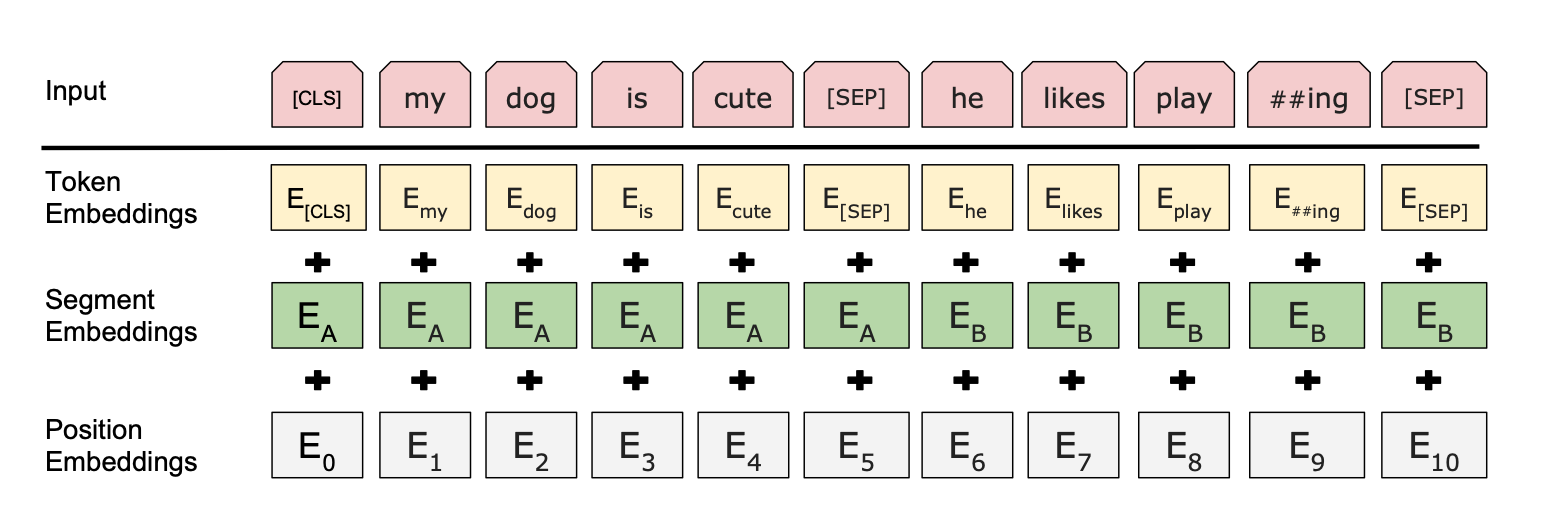

Now the next step will be to create **masking**. 

As mentioned in the original paper, BERT randomly assigns masks to 15% of the sequence. But keep in mind that you don’t assign masks to the special tokens. For that, we will use conditional statements.

Once we replace 15% of the words with [MASK] tokens, we will add padding. Padding is usually done to make sure that all the sentences are of equal length. For instance, if we take the sentence :

***“The cat is walking. The dog is barking at the tree”***

then with padding, it will look like this: 

***“[CLS] The cat is walking [PAD] [PAD] [PAD]. [CLS] The dog is barking at the tree.”***  

The length of the first sentence is equal to the length of the second sentence. 

In [25]:
import random

In [40]:
class DataGenerator(object):
    
    def __init__(self, max_length: int, max_mask: int, seed: int = 0):
        self.PAD = 0
        self.CLS = 1
        self.SEP = 2
        self.MASK = 3
        self.word_token_dict: Dict[str, int] = {'[PAD]': self.PAD, '[CLS]': self.CLS, '[SEP]': self.SEP, '[MASK]': self.MASK}
        self.token_word_dict: Dict[int, str] = {}
        self.sentence_tokens: List[List[int]] = []
        
        self.max_length = max_length
        self.max_mask = max_mask
        self.seed = seed
        self.rng = random.Random(self.seed)
    
    @property
    def vocab_size(self) -> int:
        return len(self.word_token_dict)
    
    def fit(self, sentences: List[str]):
        for s in sentences:
            tokens = []
            for word in s.split():
                if (token := self.word_token_dict.get(word)) is None:
                    token = len(self.word_token_dict)
                    self.word_token_dict[token] = token
                tokens.append(token)
            self.sentence_tokens.append(tokens)
        self.token_word_dict = {id_: token for token, id_ in self.word_token_dict.items()}
    
    def make_batch(self, sentences: List[str], batch_size: int):
        negative = positive = 0
        batch_size = batch_size // 2 * 2
        
        batch = []
        
        while positive < batch_size / 2 or negative < batch_size / 2:
            # Choose the label and sample
            if negative == batch_size / 2:
                # 负样本饱和，需要采正样本
                a_index = self.rng.randrange(0, len(self.sentence_tokens) - 1)
                b_index = a_index + 1
            else:
                # 随便采
                a_index = self.rng.randrange(0, len(self.sentence_tokens))
                b_index = self.rng.randrange(0, len(self.sentence_tokens))
                if positive == batch_size / 2:
                    # 正样本饱和，需要采负样本
                    while b_index != a_index + 1:
                        b_index = self.rng.randrange(0, len(self.sentence_tokens))
            
            label = b_index == a_index + 1
            if label:
                positive += 1
            else:
                negative += 1
            
            a_tokens, b_tokens = self.sentence_tokens[a_index], self.sentence_tokens[b_index]
            
            input_ids = [self.CLS] + a_tokens + [self.SEP] + b_tokens + [self.SEP]
            segment_ids = [0] + [0] * len(a_tokens) + [0] + [1] * len(b_tokens) + [1]
            
            # Mask
            # don't mask the [CLS] or [SEP]
            positions = [i + 1 for i in range(len(a_tokens))] + [i + 2 + len(a_tokens) for i in range(len(b_tokens))]
            self.rng.shuffle(positions)
            n_mask = min(self.max_mask, max(1, int(round(len(input_ids) * 0.15))))   # mask 15% tokens in one sentence
            
            masked_tokens, masked_pos = [], []
            for pos in positions[:n_mask]:
                masked_pos.append(pos)
                masked_tokens.append(input_ids[pos])
                rand = self.rng.random()
                if rand < 0.8:   # 80%  put mask
                    input_ids[pos] = self.MASK
                elif rand < 0.9:  # 10%  replace with random token
                    input_ids[pos] = self.rng.randint(self.MASK + 1, self.vocab_size - 1)
            
            # Zero padding
            if (n_pad := self.max_length - len(input_ids)) > 0:
                input_ids.extend([self.PAD] * n_pad)
                segment_ids.extend([self.PAD] * n_pad)
            
            if (n_pad := self.max_mask - n_mask) > 0:
                masked_pos.extend([self.PAD] * n_pad)
                masked_tokens.extend([self.PAD] * n_pad)
            
            batch.append([input_ids, segment_ids, masked_tokens, masked_pos, label])
            
        return batch

In [81]:
data = DataGenerator(30, 5)
data.fit(sentences)
batch = data.make_batch(sentences, 4)
input_ids = np.array(batch[0][0], dtype=np.int64)

## 3.2 Building model

BERT is a complex model and if it is perceived slowly you lose track of the logic. So it’ll only make sense to explain its component by component and their function.

BERT has the following components:

1. Embedding layers  
2. Attention Mask  
3. Encoder layer  
    + Multi-head attention  
        + Scaled dot product attention  
    + Position-wise feed-forward network  
4. BERT (assembling all the components)  
To make learning easier you can always refer to this diagram. 

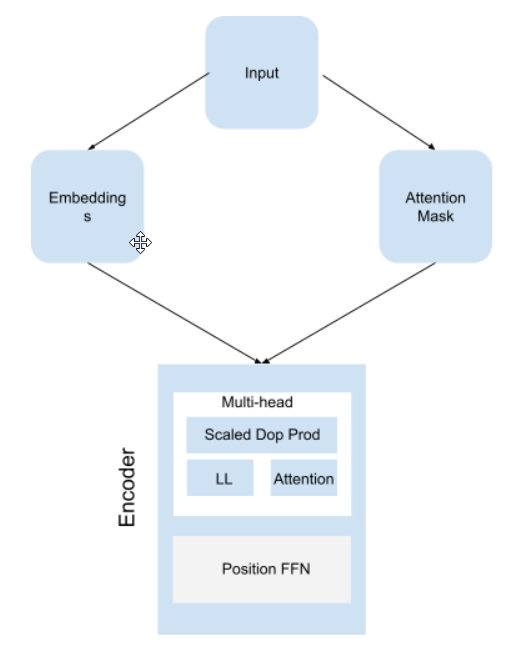

### 3.2.1 Embedding layer

If you recall we haven’t created a function that takes the input and formats it for position embedding but the formatting for token and segments are completed. So we will take the input and create a position for each word in the sequence. And it looks something like this:

In [45]:
postions = torch.arange(30, dtype=torch.long)

In the forward function, we sum up all the embeddings and normalize them. 
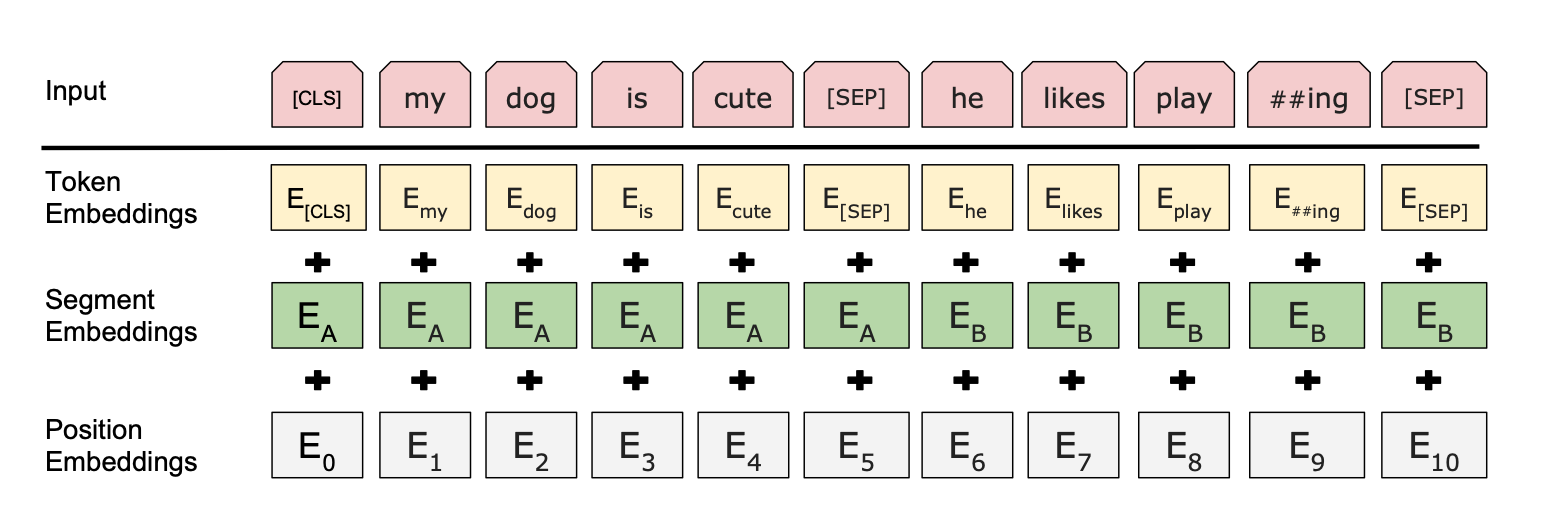

In [59]:
class Embedding(nn.Module):
    
    def __init__(self, vocab_size: int, max_length: int, n_seg: int, d_model: int):
        super(Embedding, self).__init__()
        self.tok_emb = nn.Embedding(vocab_size, d_model)
        self.seg_emb = nn.Embedding(n_seg, d_model)
        self.pos_emb = nn.Embedding(max_length, d_model)
        
        self.norm = nn.LayerNorm(d_model)
    
    def forward(self, x, seg):
        seq_length = x.shape[1]
        pos = torch.arange(seq_length, dtype=torch.long)   # (seq_len,)
        pos = pos[None, :].expand_as(x)                    # (seq_len,) -> (1, seq_len) -> [batch_size, seq_len]
        embedding = self.tok_emb(x) + self.pos_emb(pos) + self.seg_emb(seg)
        return self.norm(embedding)

### 3.2.2 Creating attention mask

[BERT needs attention masks](https://neptune.ai/blog/unmasking-bert-transformer-model-performance). And these should be in a proper format. The following code will help you create masks. 

It will convert the [PAD] to 1 and elsewhere 0. 

In [74]:
def get_attn_pad_mask(seq_q: torch.Tensor, seq_k: torch.Tensor):
    
    # len_q == len_k
    batch_size, len_q = seq_q.shape
    batch_size, len_k = seq_k.shape
    
    # find PAD tokens which eq 0
    # (batch_size, len_k) -> (batch_size, 1, len_k) -> (batch_size, len_q, len_k)
    pad_attn_mask = seq_k.detach().eq(0)[:, None, :].expand(batch_size, len_q, len_k)
    return pad_attn_mask

In [89]:
x = torch.from_numpy(input_ids)[None, :]
print(x.shape)
x.dtype

torch.Size([1, 30])


torch.int64

In [95]:
print(get_attn_pad_mask(x, x)[0][0])
print(x[0])

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True])
tensor([ 1, 29, 30, 31,  3, 33, 34, 35,  2, 29, 30,  3, 32, 33, 34,  3,  2,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])


### 3.2.3 Encoder

The encoder has two main components: 

+ Multi-head Attention
+ Position-wise feed-forward network.   

The work of the encoder is to find representations and patterns from the input and attention mask. 

#### Multi-head Attention

This is the first of the main components of the encoder. 

The attention model takes three inputs: **Query**, **Key**, and **Value**. 

*I highly recommend you to read [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/) by Jay Alammar that explains Attention models in depth.*

Multihead attention takes four inputs: **Query, Key, Value**, and **Attention mask**. The embeddings are fed as input to the Query, Key, and Value argument, and the attention mask is fed as input to the attention mask argument.   
These three inputs and the attention mask are operated with a dot product operation that yields two outputs: **context vectors** and **attention**. The context vector is then passed through a linear layer and finally that yields the output.

Now, let’s explore this **Scaled Dot Product attention**:

+ The scaled dot product attention class takes four arguments: Query, Key, Value, and Attention mask. Essentially, the first three arguments are fed with the word embeddings and the attention mask argument is fed with attention mask embeddings.  
+ Then it does a matrix multiplication between **query** and **key** to get scores.   

Following that we use scores.masked_fill_(attn_mask, -1e9) . This attribute fills the element of scores with -1e9 where the attention masks are True while the rest of the elements get an attention score which is then passed through a softmax function that gives a score between 0 and 1. Finally, we perform a matrix multiplication between attention and values which gives us the context vectors. 

In [96]:
class ScaledDotProductAttention(nn.Module):
    
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()
        
    def forward(self, Q, K, V, attn_mask=None):
        
        # 取最后一维，即词向量长度
        d_k = Q.size(-1)
        # [B, h, S, S]
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k)
        
        # [B, h, S, S]
        if attn_mask is not None:
            scores.masked_fill(attn_mask, -1e9)
        
        # [B, h, S, S]
        attn = F.softmax(scores, dim=-1)
        
        # [B, h, S, dk]
        context = torch.matmul(attn, V)
        
        return context, attn

In [97]:
class MultiHeadAttention(nn.Module):
    
    def __init__(self, d_model: int, n_heads: int):
        super(MultiHeadAttention, self).__init__()
        assert d_model % n_heads == 0
        
        self.d_model = d_model
        self.d_k = d_model // n_heads
        self.n_heads = n_heads
        
        self.W_Q = nn.Linear(d_model, d_model)
        self.W_K = nn.Linear(d_model, d_model)
        self.W_V = nn.Linear(d_model, d_model)
        self.W = nn.Linear(d_model, d_model)
    
    def forward(self, Q, K, V, attn_mask=None):
        """
        @param Q: [B, S, D]  S -> seq_q, D -> d_model
        @param K: [B, S, D]
        @param V: [B, S, D]
        @param attn_mask: [B, S, S]
        """
        batch_size = Q.size(0)
        
        # [B, h, S, dk]
        q_s = self.W_Q(Q).view(batch_size, -1, self.n_heads, self.d_k).transpose(1, 2)
        k_s = self.W_K(K).view(batch_size, -1, self.n_heads, self.d_k).transpose(1, 2)
        v_s = self.W_V(V).view(batch_size, -1, self.n_heads, self.d_k).transpose(1, 2)
        
        # [B, h, S, S]
        attn_mask = attn_mask.unsqueeze(1).repeat(1, self.n_heads, 1, 1)
        
        # context: [B, h, S, dk]
        # attn: [B, h, S, S]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        # context: [B, h, S, dk] -> [B, S, D]
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        
        output = self.W(context)
        return nn.LayerNorm(self.d_model)(output + Q), attn
        

#### Position-Wise Feed Forward Network

The output from the multihead goes into the feed-forward network and that concludes the encoder part.

In [98]:
class FeedForward(nn.Module):
    
    def __init__(self, n_input: int, hidden_size: int, dropout: float = 0.1):
        
        super(FeedForward, self).__init__()
        
        self.w1 = nn.Linear(n_input, hidden_size)
        self.w2 = nn.Linear(hidden_size, n_input)
        
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        x = self.w1(x)
        x = F.relu(x)
        x = self.dropout(x)
        return self.w2(x)

Let’s take a breath and revise what we’ve learned so far:

+ The input goes into the embedding and as well attention function. Both of which are fed into the encoder which has a multi-head function and a feed-forward network. 
+ The multi-head function itself has a function that operates the embeddings and attention mask using a dot product operation.   



In [154]:
class EncoderLayer(nn.Module):
    
    def __init__(self, d_model: int, n_heads: int, hidden_size: int):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = FeedForward(d_model, hidden_size)
    
    def forward(self, enc_inputs, enc_self_attn_mask):
        enc_outputs, attn = self.enc_self_attn(enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask)
        enc_outputs = self.ffn(enc_outputs)
        return enc_outputs, attn

#### Assembling all the components

Let’s continue from where we left, i.e. the output from the encoder.

The encoder yields two outputs: 

+ One which comes from the feed-forward layer and 
+ the Attention mask. 
It’s key to remember that BERT does not explicitly use a decoder. Instead, it uses the output and the attention mask to get the desired result. 

Although the decoder section in the transformers is replaced with a shallow network which can be used for classification as shown in the code below.
Also, BERT outputs two results: one for the **classifier** and the other for **masked**.

In [155]:
def gelu(x):
    """Gaussian Error Linear Unit"""
    return 0.5 * x * (1.0 + torch.erf(x / math.sqrt(2.0)))



class BERT(nn.Module):
    
    def __init__(self, vocab_size: int, max_length: int, d_model: int, n_heads: int, hidden_size: int, n_layers: int):
        super(BERT, self).__init__()
        self.embedding = Embedding(vocab_size, max_length, 2, d_model)
        self.layers = nn.ModuleList([EncoderLayer(d_model, n_heads, hidden_size) for _ in range(n_layers)])
        self.fc = nn.Linear(d_model, d_model)
        self.activ1 = nn.Tanh()
        self.linear = nn.Linear(d_model, d_model)
        self.activ2 = gelu
        self.norm = nn.LayerNorm(d_model)
        self.classifier = nn.Linear(d_model, 2)
        
        # decoder is shared with embedding layer
        embed_weight = self.embedding.tok_emb.weight
        self.decoder = nn.Linear(d_model, vocab_size, bias=False)
        self.decoder.weight = embed_weight
        self.decoder_bias = nn.Parameter(torch.zeros(vocab_size))
    
    def forward(self, input_ids, segment_ids, masked_pos):
        output = self.embedding(input_ids, segment_ids)
        enc_self_attn_mask = get_attn_pad_mask(input_ids, input_ids)
        for layer in self.layers:
            # output: [B, S, D]
            # enc_self_attn: [B, h, S, S]
            output, enc_self_attn = layer(output, enc_self_attn_mask)
            
        # decided by first token(e.g. [CLS])
        # [B, S]
        h_pooled = self.activ1(self.fc(output[:, 0]))
        
        # [B, 2]
        logits_clsf = self.classifier(h_pooled)
        
        # masked_pos: [B, S] -> [B, S, D]
        masked_pos = masked_pos[:, :, None].expand(-1, -1, output.size(-1))
        h_masked = torch.gather(output, 1, masked_pos)    # 因为masked_pos中的值代表位置，所以对应output的dim1
        
        # 关于mask部分的预测
        # [B, max_pred, n_vocab]
        logits_lm = self.decoder(h_masked) + self.decoder_bias
        return logits_clsf, logits_lm
        

In [174]:
model = BERT(100, 30, 64, 8, 128, 12)

total = 0
require_grad = 0

for param in model.parameters():
    n = param.numel()
    total += n
    if param.requires_grad:
        require_grad += n

print(f"Total: {total}, require_grad: {require_grad}")

Total: 415846, require_grad: 415846


#### Loss and optimization

Although the original paper calculates the probability distribution over all the vocabulary, we can use a softmax approximation. But a neat way to do it is to use *cross-entropy loss*. It’s a combination of both *softmax* and *negative log-likelihood*. 

So while building the model you don’t have to include softmax instead get a clean output from feed-forward neural nets without softmax normalization. 

When it comes to optimization we will be using Adam optimizer. 

In [175]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### Training

In [177]:
max_length = 30
max_mask = 5
batch_size = 4

data = DataGenerator(max_length, max_mask)
data.fit(sentences)
batch = data.make_batch(sentences, batch_size)
input_ids, segment_ids, masked_tokens, masked_pos, label = map(torch.LongTensor, zip(*batch))


for epoch in range(100):
    optimizer.zero_grad()
    logits_clsf, logits_lm = model(input_ids, segment_ids, masked_pos)
    loss_lm = criterion(logits_lm.transpose(1, 2), masked_tokens)   # for MLM loss, 要求输入形状为[B, V, S]，即序列长度作为最后一维
    loss_clsf = criterion(logits_clsf, label)
    loss = loss_lm + loss_clsf
    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {(epoch + 1):04d}, cost={loss:.6f}")
    loss.backward()
    optimizer.step()


In [ ]:
# Predict mask tokens
input_ids, segment_ids, masked_tokens, masked_pos, label = map(torch.LongTensor, zip(batch[0]))
print(text)

logits_clsf, logits_lm = model(input_ids, segment_ids, masked_pos)
logits_lm = logis_lm.detach().argmax(2)[0].numpy()


# print([number_dict[w.item()] for w in input_ids[0] if number_dict[w.item()] != '[PAD]'])
# print('masked tokens list : ', [pos for pos in masked_tokens[0].numpy() if pos != 0])
# print('predict masked tokens list : ', [pos for pos in logits_lm if pos != 0])

# logits_clsf = logits_clsf.detach().argmax(1).numpy()
# print('isNext : ', label.numpy()[0])
# print('predict isNext : ',True if logits_clsf else False)